# Query of NGC 1545 in GAIA3

Selection of the stars belonging to the open cluster with a selection on the parallaxes and on the distances.

In [262]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from astropy import units as u
from astropy.coordinates import SkyCoord, Distance
from astropy.io import fits
from astropy.table import QTable
from astropy.utils.data import download_file

from astroquery.gaia import Gaia
Gaia.ROW_LIMIT = 15000  # Set the row limit for returned data

In [263]:
ngc1545_center = SkyCoord(65.09175940899979*u.deg, 50.30627580120292*u.deg, frame='icrs')
ngc1545_center

<SkyCoord (ICRS): (ra, dec) in deg
    (65.09175941, 50.3062758)>

In [264]:
ngc1545_center = SkyCoord.from_name('NGC 1545')
job = Gaia.cone_search_async(ngc1545_center, radius=0.25*u.deg)
ngc1545_table = job.get_results()

<SkyCoord (ICRS): (ra, dec) in deg
    (65.202, 50.221)>

QUERY CATALOGUE

In [318]:
job = Gaia.cone_search_async(ngc1545_center, radius=0.25*u.deg)
ngc1545_table = job.get_results()

# only keep stars brighter than G=19 magnitude
#ngc2437_table = ngc2437_table[ngc2437_table['phot_g_mean_mag'] < 19*u.mag]

INFO: Query finished. [astroquery.utils.tap.core]


In [267]:
len(ngc1545_table)

9342

In [268]:
ngc1545_table = ngc1545_table[ngc1545_table['phot_g_mean_mag'] < 19*u.mag]

In [269]:
len(ngc1545_table)

3540

In [270]:
cols = ['source_id',
 'ra',
 'dec',
 'parallax',
 'parallax_error',
 'pmra',
 'pmdec',
 'radial_velocity',
 'phot_g_mean_mag',
 'phot_bp_mean_mag',
 'phot_rp_mean_mag']
ngc1545_table[cols].write('gaia_results.fits', overwrite=True)

In [271]:
ngc1545_table = QTable.read('gaia_results.fits')

In [273]:
ngc1545_table['ra']

<Quantity [65.20405572, 65.19333425, 65.20792965, ..., 64.84017212,
           65.23358345, 65.51347361] deg>

In [274]:
ngc1545_table['dec']

<Quantity [50.22300577, 50.21827183, 50.22963707, ..., 50.12764275,
           49.97196445, 50.07063657] deg>

In [275]:
ngc1545_gaia_coords = SkyCoord(ngc1545_table['ra'], ngc1545_table['dec'])
ngc1545_gaia_coords

<SkyCoord (ICRS): (ra, dec) in deg
    [(65.20405572, 50.22300577), (65.19333425, 50.21827183),
     (65.20792965, 50.22963707), ..., (64.84017212, 50.12764275),
     (65.23358345, 49.97196445), (65.51347361, 50.07063657)]>

In [277]:
ngc1545_gaia_coords.separation(ngc1545_center)

<Angle [0.00239856, 0.00617958, 0.00943348, ..., 0.24983215, 0.24985835,
        0.24990104] deg>

In [279]:
ngc1545_center_3d = SkyCoord(65.202*u.deg, 50.221*u.deg,
                            distance=0.711*u.kpc)

In [281]:
parallax_snr = ngc1545_table['parallax'] / ngc1545_table['parallax_error']
ngc1545_table_3d = ngc1545_table[parallax_snr > 10] 


len(ngc1545_table_3d)
parallax_snr

<Quantity [ 3.38279018,  5.24078756,  1.1067718 , ...,  5.06066242,
           -0.25535815, -0.58119625]>

In [282]:
Distance(parallax=1*u.mas)

<Distance 1000. pc>

In [283]:
gaia_dist = Distance(parallax=ngc1545_table_3d['parallax'])
gaia_dist

<Distance [ 621.33199087, 2865.3590519 , 1627.49194513,  710.25613603,
            622.75940308,  613.03356702,  881.43564568,  818.28828872,
            851.81034738, 1171.38675094,  729.05645219,  798.55881324,
            755.0045307 , 1163.37854739,  547.24621285, 1271.1215855 ,
            775.1543384 ,  480.23283518,  350.95454865, 1696.29285469,
            675.70264649,  708.33554002, 1354.78785464,  865.67888548,
            874.06810133, 1446.77298596, 1248.25207056,  725.10288124,
           1276.74764025,  696.2363015 ,  677.57175889,  294.8317837 ,
            832.05958626, 1392.81297029,  705.95543507, 1585.36776306,
            740.29900557, 1629.88658936, 1181.74109309,  874.84691996,
            757.32027511,  730.98230262,  791.68853869,  736.09837892,
           1063.82892332, 1156.81890892,  798.17136923,  578.25474603,
            556.63461048,  651.44667937, 1103.79990529,  745.38250673,
           1105.46594555, 1207.78889789, 1895.03186409,  856.37283456,
      

In [285]:
gaia_dist = Distance(parallax=ngc1545_table_3d['parallax'])
ngc1545_coords_3d = SkyCoord(ra=ngc1545_table_3d['ra'], 
                            dec=ngc1545_table_3d['dec'],
                            distance=gaia_dist)


ngc1545_coords_3d
len(ngc1545_coords_3d)

537

Text(0.5, 1.0, 'Gaia DR2 sources near NGC 1545')

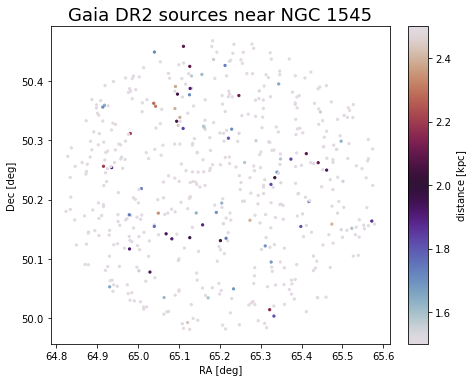

In [287]:
fig, ax = plt.subplots(figsize=(6.5, 5.2),
                       constrained_layout=True)
cs = ax.scatter(ngc1545_coords_3d.ra.degree, 
                ngc1545_coords_3d.dec.degree, 
                c=ngc1545_coords_3d.distance.kpc, 
                s=5, vmin=1.5, vmax=2.5, cmap='twilight')
cb = fig.colorbar(cs)
cb.set_label(f'distance [{u.kpc:latex_inline}]')

ax.set_xlabel('RA [deg]')
ax.set_ylabel('Dec [deg]')

ax.set_title('Gaia DR2 sources near NGC 1545', fontsize=18)

In [289]:
sep3d = ngc1545_coords_3d.separation_3d(ngc1545_center_3d)
sep3d

<Distance [8.96683033e+01, 2.15435914e+03, 9.16492084e+02, 8.36572385e-01,
           8.82413663e+01, 9.79671499e+01, 1.70436243e+02, 1.07289174e+02,
           1.40811110e+02, 4.60387089e+02, 1.80619413e+01, 8.75601629e+01,
           4.40071550e+01, 4.52378942e+02, 1.63754358e+02, 5.60121977e+02,
           6.41565921e+01, 2.30767556e+02, 3.60045638e+02, 9.85293201e+02,
           3.53012660e+01, 2.71936356e+00, 6.43788303e+02, 1.54680168e+02,
           1.63069454e+02, 7.35773483e+02, 5.37252662e+02, 1.41169053e+01,
           5.65748259e+02, 1.47769982e+01, 3.34339767e+01, 4.16168427e+02,
           1.21061648e+02, 6.81813586e+02, 5.08786599e+00, 8.74368375e+02,
           2.93081383e+01, 9.18887235e+02, 4.70742059e+02, 1.63849033e+02,
           4.63268410e+01, 1.99972365e+01, 8.06926040e+01, 2.51109350e+01,
           3.52830228e+02, 4.45820047e+02, 8.71755381e+01, 1.32747287e+02,
           1.54367150e+02, 5.95586747e+01, 3.92801284e+02, 3.43933619e+01,
           3.94467366e+02

In [291]:
ngc1545_3d_mask = sep3d < 100*u.pc
ngc1545_3d_mask.sum()

128

In [292]:
ngc1545_members = ngc1545_table_3d[ngc1545_3d_mask]
ngc1545_members_coords = ngc1545_coords_3d[ngc1545_3d_mask]
len(ngc1545_members)

128

In [293]:
from astropy.io import ascii
name_csv = 'NGC1545-Gaia-less100pc.csv'
ascii.write(ngc1545_members, name_csv, format='csv', overwrite=True )

In [294]:
ngc1545_members

source_id,ra,dec,parallax,parallax_error,pmra,pmdec,radial_velocity,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag
,deg,deg,mas,mas,mas / yr,mas / yr,km / s,mag,mag,mag
int64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32
270665922717252352,65.20707347551121,50.20146785336598,1.6094455374920176,0.041619677617130674,-0.05500305966896901,-5.7547133914275435,1e+20,15.48967456817627,16.156274795532227,14.697970390319824
270666330735648128,65.2498021210983,50.21688286997158,1.4079427818635657,0.11069894230209422,-1.7131718526377053,-0.020136059096353052,1e+20,17.3516902923584,18.293960571289062,16.378934860229492
270665888357526656,65.18741004664521,50.19067712527494,1.6057565651306385,0.05079113725852206,10.015168532046845,-24.45730030001488,1e+20,14.141936302185059,14.63163948059082,13.490936279296875
270669083813185280,65.15116565358302,50.22112270128298,1.6312320463445653,0.0384569637296716,-1.3975409980021878,-0.4737620491766795,1e+20,11.739593505859375,11.972491264343262,11.364331245422363
270669221252110208,65.17661566970504,50.25249540970388,1.371635895949395,0.02739235261554408,-1.3506563897339694,0.5522886770209812,1e+20,14.09617805480957,14.626587867736816,13.409073829650879
270669393050811008,65.16047039705167,50.24670737650233,1.2522559183125914,0.04156656334612353,-3.74591869148761,-2.3600553620894376,1e+20,12.619795799255371,13.019957542419434,12.051581382751465
270669079518502272,65.14367379920316,50.22546255756988,1.3244953630573817,0.037002355744646796,-1.950829263219747,-0.37921278354368304,1e+20,15.19329833984375,15.836138725280762,14.417946815490723
270666609911975424,65.23957541093544,50.254835722375965,1.290065668803443,0.03867286437545981,-2.1670239462197185,-0.25365398108477394,-11.254096456379752,6.521875381469727,7.429482460021973,5.621600151062012


In [295]:
Gmag = ngc1545_members['phot_g_mean_mag']
Bmag = ngc1545_members['phot_bp_mean_mag']
Rmag = ngc1545_members['phot_rp_mean_mag']
BRgaiaColor = Bmag - Rmag

(22.0, 8.0)

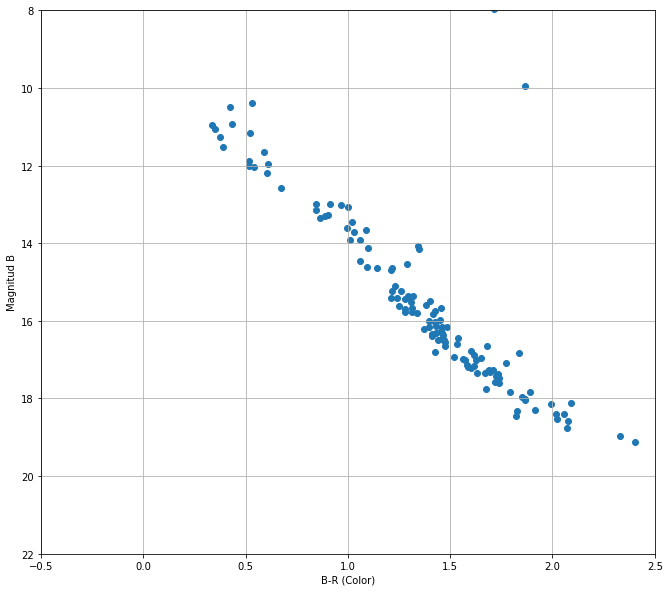

In [296]:
fig = plt.figure(figsize=(11,10))
plt.grid(True)
plt.scatter(BRgaiaColor, Bmag)
plt.xlabel('B-R (Color)')
plt.ylabel('Magnitud B')
plt.xlim(-0.5, 2.5)
plt.ylim(22, 8)

SELECTION WITH A LARGER DISTANCE TO THE CLUSTER CENTER

In [299]:
ngc1545_3d_mask = sep3d < 200*u.pc
ngc1545_3d_mask.sum()

207

In [300]:
ngc1545_members = ngc1545_table_3d[ngc1545_3d_mask]
ngc1545_members_coords = ngc1545_coords_3d[ngc1545_3d_mask]
len(ngc1545_members)

207

In [301]:
name_csv = 'NGC1545-Gaia-less200pc.csv'
ascii.write(ngc1545_members, name_csv, format='csv', overwrite=True )

In [302]:
Gmag = ngc1545_members['phot_g_mean_mag']
Bmag = ngc1545_members['phot_bp_mean_mag']
Rmag = ngc1545_members['phot_rp_mean_mag']
BRgaiaColor = Bmag - Rmag

(22.0, 8.0)

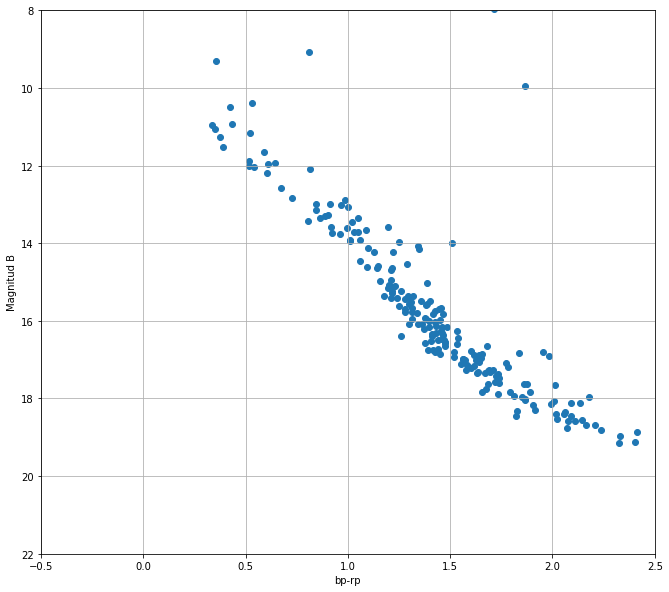

In [303]:
fig = plt.figure(figsize=(11,10))
plt.grid(True)
plt.scatter(BRgaiaColor, Bmag)
plt.xlabel('bp-rp')
plt.ylabel('Magnitud B')
plt.xlim(-0.5, 2.5)
plt.ylim(22, 8)

Extraction 

In [307]:
from astropy.io import ascii
NGC1545BmagVmagBVcolorLCO = ascii.read('Test-photBandVandColor.csv', format='csv')
print('NGC1545BmagVmagBVcolorLCO', NGC1545BmagVmagBVcolorLCO.colnames)
print('\n')
NGC1545BmagVmagBVcolorLCO

NGC1545BmagVmagBVcolorLCO ['id', 'xcenter', 'ycenter', 'aperture_sum', 'annulus_median', 'aper_bkg', 'ra', 'dec', 'mag', 'Vmag', 'BVcolor', 'Bmag']




id,xcenter,ycenter,aperture_sum,annulus_median,aper_bkg,ra,dec,mag,Vmag,BVcolor,Bmag
int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,920.8631477826809,1.0954601854175678,9684.348833683112,0.0,0.0,64.93505154531944,50.31705388841759,14.317614752878779,14.33375468202387,-0.016139929145090548,14.317614752878779
2,988.3139784981691,4.951586183830707,6812.513511459643,0.0,0.0,64.93605933458032,50.306363903439006,14.588014133566151,14.703890608294667,-0.11587647472851614,14.588014133566151
3,848.31729368555,15.559599782750793,5998.41651049537,6.881945848464966,2233.277161300666,64.93858842270612,50.328560253771805,15.04385053552601,15.335606627425985,-0.2917560918999751,15.04385053552601
4,1819.18717095187,61.751130873801415,55535.10276450201,8.740543365478516,2836.415209491255,64.95073800573806,50.17468562909336,13.01533144477213,13.20110757048093,-0.18577612570880042,13.01533144477213
5,1891.7831566438974,62.64943042232616,28323.313996471556,8.210785388946533,2664.5021465209,64.95101096077899,50.16317858811073,13.56858638669351,13.70497815338523,-0.1363917666917196,13.56858638669351
6,79.51911045012962,82.84000784735639,3424.3400290878826,6.9233667850494385,2246.718771233476,64.95476613131495,50.45045484962182,15.937332056024344,16.139478963107372,-0.20214690708302818,15.937332056024344
7,1079.9116100401088,88.65658924419998,8852.324126605032,3.7796008586883545,1226.5275639191277,64.9568961124337,50.29188270172552,14.501320542416185,15.055837550046864,-0.5545170076306789,14.501320542416185
8,2208.391584814512,118.47450868018622,5884.51632501483,5.133046627044678,1665.737576622644,64.96503050809672,50.11301599514285,14.956399613155053,15.500811838399812,-0.5444122252447592,14.956399613155053
9,1320.0236147081998,129.37487467205926,5664.496048438068,5.423170804977417,1759.8864866526233,64.96715376528965,50.25383893155994,15.01588971716452,15.771703207799664,-0.7558134906351448,15.01588971716452


In [308]:
from astropy.io import ascii
#name_csv = 'NGC1545-Gaia-less200pc.csv'
NGC1545Gaialess200pc = ascii.read('NGC1545-Gaia-less200pc.csv', format='csv')

In [309]:
print('NGC1545Gaialess200pc', NGC1545Gaialess200pc.colnames)
print('\n')
NGC1545Gaialess200pc

NGC1545Gaialess200pc ['source_id', 'ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec', 'radial_velocity', 'phot_g_mean_mag', 'phot_bp_mean_mag', 'phot_rp_mean_mag']




source_id,ra,dec,parallax,parallax_error,pmra,pmdec,radial_velocity,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag
str18,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
270665922717252352,65.20707347551121,50.20146785336598,1.6094455374920176,0.041619677617130674,-0.05500305966896901,-5.7547133914275435,1e+20,15.48967456817627,16.156274795532227,14.697970390319824
270666330735648128,65.2498021210983,50.21688286997158,1.4079427818635657,0.11069894230209422,-1.7131718526377053,-0.020136059096353052,1e+20,17.3516902923584,18.293960571289062,16.378934860229492
270665888357526656,65.18741004664521,50.19067712527494,1.6057565651306385,0.05079113725852206,10.015168532046845,-24.45730030001488,1e+20,14.141936302185059,14.63163948059082,13.490936279296875
270669083813185280,65.15116565358302,50.22112270128298,1.6312320463445653,0.0384569637296716,-1.3975409980021878,-0.4737620491766795,1e+20,11.739593505859375,11.972491264343262,11.364331245422363
270666335034080640,65.25164203290909,50.22864180006365,1.1345127745926342,0.043592779831134645,-4.966683804062836,-2.865343190554864,1e+20,15.537220001220703,16.081212997436523,14.783945083618164
270669221252112768,65.17497362030497,50.24879761763765,1.2220631943382483,0.0566714275640275,-1.9196664986584167,0.2181916713808904,1e+20,9.18391227722168,9.315716743469238,8.960620880126953
270665819638046720,65.20515393207033,50.18692972021106,1.1739702424122176,0.06429098770902096,-0.6661403812342058,-0.19241519649143957,1e+20,16.394824981689453,17.1131591796875,15.560911178588867
270669221252110208,65.17661566970504,50.25249540970388,1.371635895949395,0.02739235261554408,-1.3506563897339694,0.5522886770209812,1e+20,14.09617805480957,14.626587867736816,13.409073829650879
270669393050811008,65.16047039705167,50.24670737650233,1.2522559183125914,0.04156656334612353,-3.74591869148761,-2.3600553620894376,1e+20,12.619795799255371,13.019957542419434,12.051581382751465


In [310]:
from astropy.io import ascii
#name_csv = 'NGC2437-Gaia-less100pc.csv'
NGC1545Gaialess100pc = ascii.read('NGC1545-Gaia-less100pc.csv', format='csv')

In [311]:
print('NGC1545Gaialess100pc', NGC1545Gaialess100pc.colnames)
print('\n')
NGC1545Gaialess100pc

NGC1545Gaialess100pc ['source_id', 'ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec', 'radial_velocity', 'phot_g_mean_mag', 'phot_bp_mean_mag', 'phot_rp_mean_mag']




source_id,ra,dec,parallax,parallax_error,pmra,pmdec,radial_velocity,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag
str18,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
270665922717252352,65.20707347551121,50.20146785336598,1.6094455374920176,0.041619677617130674,-0.05500305966896901,-5.7547133914275435,1e+20,15.48967456817627,16.156274795532227,14.697970390319824
270666330735648128,65.2498021210983,50.21688286997158,1.4079427818635657,0.11069894230209422,-1.7131718526377053,-0.020136059096353052,1e+20,17.3516902923584,18.293960571289062,16.378934860229492
270665888357526656,65.18741004664521,50.19067712527494,1.6057565651306385,0.05079113725852206,10.015168532046845,-24.45730030001488,1e+20,14.141936302185059,14.63163948059082,13.490936279296875
270669083813185280,65.15116565358302,50.22112270128298,1.6312320463445653,0.0384569637296716,-1.3975409980021878,-0.4737620491766795,1e+20,11.739593505859375,11.972491264343262,11.364331245422363
270669221252110208,65.17661566970504,50.25249540970388,1.371635895949395,0.02739235261554408,-1.3506563897339694,0.5522886770209812,1e+20,14.09617805480957,14.626587867736816,13.409073829650879
270669393050811008,65.16047039705167,50.24670737650233,1.2522559183125914,0.04156656334612353,-3.74591869148761,-2.3600553620894376,1e+20,12.619795799255371,13.019957542419434,12.051581382751465
270669079518502272,65.14367379920316,50.22546255756988,1.3244953630573817,0.037002355744646796,-1.950829263219747,-0.37921278354368304,1e+20,15.19329833984375,15.836138725280762,14.417946815490723
270666609911975424,65.23957541093544,50.254835722375965,1.290065668803443,0.03867286437545981,-2.1670239462197185,-0.25365398108477394,-11.254096456379752,6.521875381469727,7.429482460021973,5.621600151062012
270669289971600640,65.14678332250655,50.246296572047676,1.4799409254861424,0.04988128816237386,-1.863866581433561,0.025738539119512724,1e+20,15.885078430175781,16.594600677490234,15.059982299804688


Comparison of NGC2437Gaialess50pc and NGC2437BmagVmagBVcolorLCO

In [313]:
coo_NGC1545Gaialess100pc = SkyCoord(NGC1545Gaialess100pc['ra']*u.deg, NGC1545Gaialess100pc['dec']*u.deg)
coo_NGC1545BmagVmagBVcolorLCO = SkyCoord(NGC1545BmagVmagBVcolorLCO['ra']*u.deg, NGC1545BmagVmagBVcolorLCO['dec']*u.deg)

In [314]:
# idx_sdss, d2d_sdss, d3d_sdss = coo_twomass.match_to_catalog_sky(coo_sdss)
# idx_dataVfiltr, d2d_dataVfiltr, d3d_dataVfiltr = coo_dataBfiltr.match_to_catalog_sky(coo_dataVfiltr)

idx_NGC1545BmagVmagBVcolorLCO, d2d_NGC1545BmagVmagBVcolorLCO, d3d_NGC1545BmagVmagBVcolorLCO = coo_NGC1545Gaialess100pc.match_to_catalog_sky(coo_NGC1545BmagVmagBVcolorLCO)

id,xcenter,ycenter,aperture_sum,annulus_median,aper_bkg,ra,dec,mag,Vmag,BVcolor,Bmag
int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,920.8631477826809,1.0954601854175678,9684.348833683112,0.0,0.0,64.93505154531944,50.31705388841759,14.317614752878779,14.33375468202387,-0.016139929145090548,14.317614752878779
2,988.3139784981691,4.951586183830707,6812.513511459643,0.0,0.0,64.93605933458032,50.306363903439006,14.588014133566151,14.703890608294667,-0.11587647472851614,14.588014133566151
3,848.31729368555,15.559599782750793,5998.41651049537,6.881945848464966,2233.277161300666,64.93858842270612,50.328560253771805,15.04385053552601,15.335606627425985,-0.2917560918999751,15.04385053552601
4,1819.18717095187,61.751130873801415,55535.10276450201,8.740543365478516,2836.415209491255,64.95073800573806,50.17468562909336,13.01533144477213,13.20110757048093,-0.18577612570880042,13.01533144477213
5,1891.7831566438974,62.64943042232616,28323.313996471556,8.210785388946533,2664.5021465209,64.95101096077899,50.16317858811073,13.56858638669351,13.70497815338523,-0.1363917666917196,13.56858638669351
6,79.51911045012962,82.84000784735639,3424.3400290878826,6.9233667850494385,2246.718771233476,64.95476613131495,50.45045484962182,15.937332056024344,16.139478963107372,-0.20214690708302818,15.937332056024344
7,1079.9116100401088,88.65658924419998,8852.324126605032,3.7796008586883545,1226.5275639191277,64.9568961124337,50.29188270172552,14.501320542416185,15.055837550046864,-0.5545170076306789,14.501320542416185
8,2208.391584814512,118.47450868018622,5884.51632501483,5.133046627044678,1665.737576622644,64.96503050809672,50.11301599514285,14.956399613155053,15.500811838399812,-0.5444122252447592,14.956399613155053
9,1320.0236147081998,129.37487467205926,5664.496048438068,5.423170804977417,1759.8864866526233,64.96715376528965,50.25383893155994,15.01588971716452,15.771703207799664,-0.7558134906351448,15.01588971716452


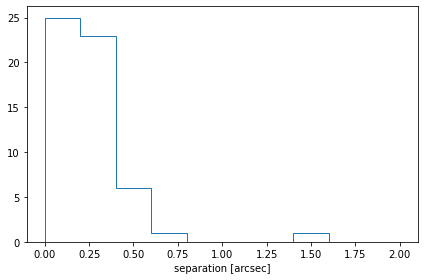

In [315]:
from matplotlib import pyplot as plt
# plt.hist(d2d_sdss.arcsec, histtype='step', range=(0,2))
# plt.xlabel('separation [arcsec]')
# plt.tight_layout()
plt.hist(d2d_NGC1545BmagVmagBVcolorLCO.arcsec, histtype='step', range=(0,2))
plt.xlabel('separation [arcsec]')
plt.tight_layout()
NGC1545BmagVmagBVcolorLCO

(18.0, 9.0)

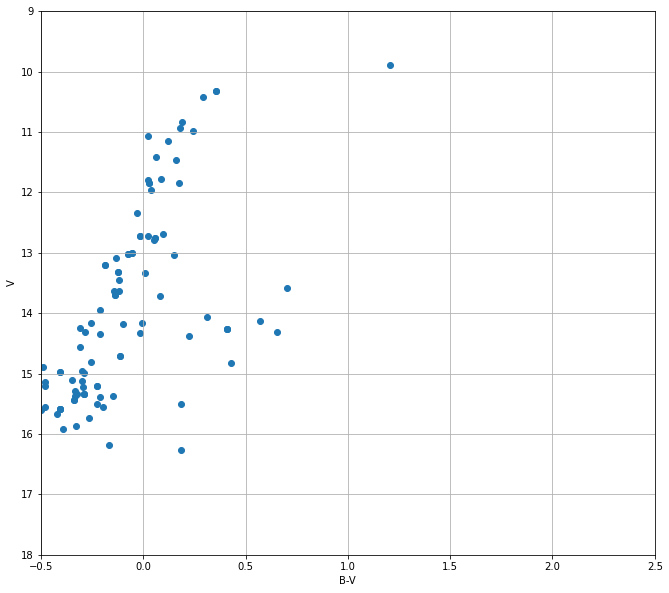

In [316]:
Vmag = NGC1545BmagVmagBVcolorLCO['Vmag'][idx_NGC1545BmagVmagBVcolorLCO]
ra = NGC1545BmagVmagBVcolorLCO['ra'][idx_NGC1545BmagVmagBVcolorLCO]
dec = NGC1545BmagVmagBVcolorLCO['dec'][idx_NGC1545BmagVmagBVcolorLCO]
BVcolor =NGC1545BmagVmagBVcolorLCO['BVcolor'][idx_NGC1545BmagVmagBVcolorLCO]
Bmag = NGC1545BmagVmagBVcolorLCO['Bmag'][idx_NGC1545BmagVmagBVcolorLCO]

fig = plt.figure(figsize=(11,10))
plt.grid(True)
plt.scatter(BVcolor, Vmag)
plt.xlabel('B-V')
plt.ylabel('V')
plt.xlim(-0.5, 2.5)
plt.ylim(18, 9) 